# What is the most optimal skills to learn in Data Analysts?
* Methology
1. Group skills to determinemedian salaryand likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent (optional)

In [25]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns
#loading dataset 
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()
#converting job_posted_date to datetime format(data cleaning step)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else  x)

In [26]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])
df_da_us_exploded=df_da_us.explode('job_skills')

In [27]:
df_da_skills=df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [28]:
df_da_skills=df_da_skills.rename(columns={'count':'job_count','median':'salary_median'})

In [29]:
df_da_skills

,job_count,salary_median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [30]:
da_job_count=len(df_da_us)
df_da_skills['skill_percentage']=df_da_skills['job_count']/da_job_count*100
df_da_skills_high_demand=df_da_skills[df_da_skills['skill_percentage']>=5]
df_da_skills_high_demand

,job_count,salary_median,skill_percentage
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


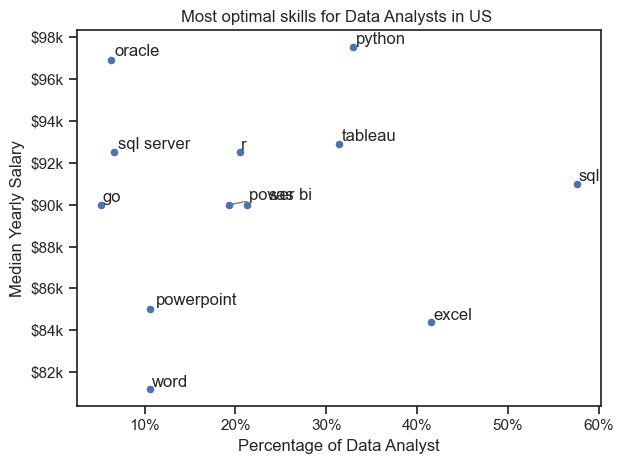

In [31]:
from adjustText import adjust_text

df_da_skills_high_demand.plot(kind='scatter', x='skill_percentage', y='salary_median')

# Prepare texts for adjustText

texts = []

for i, txt in enumerate (df_da_skills_high_demand.index):

    texts.append(plt.text(df_da_skills_high_demand['skill_percentage'].iloc[i], df_da_skills_high_demand['salary_median'].iloc[i], txt))

#Adjust text to avoid overlap

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

#Set axis labels, title, and legend

plt.xlabel('Percentage of Data Analyst')

plt.ylabel('Median Yearly Salary')

plt.title(f'Most optimal skills for Data Analysts in US ')

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#Adjust layout and display plot

plt.tight_layout()

plt.show()

In [32]:
df_technology=df['job_type_skills'].copy()
df_technology=df_technology.drop_duplicates()
df_technology=df_technology.dropna()

technology_dict ={}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
technology_dict

{'analyst_tools': ['outlook',
  'nuix',
  'datarobot',
  'tableau',
  'alteryx',
  'sheets',
  'sas',
  'visio',
  'excel',
  'spss',
  'powerpoint',
  'msaccess',
  'esquisse',
  'ssis',
  'splunk',
  'qlik',
  'powerbi',
  'word',
  'spreadsheet',
  'microstrategy',
  'looker',
  'sap',
  'power bi',
  'ssrs',
  'cognos',
  'ms access',
  'sharepoint',
  'dax'],
 'programming': ['mongo',
  'assembly',
  'julia',
  'c#',
  'rust',
  'cobol',
  'apl',
  'java',
  'c++',
  'javascript',
  'fortran',
  'matlab',
  'lisp',
  'python',
  'powershell',
  'haskell',
  'elixir',
  'sas',
  'perl',
  'swift',
  'vb.net',
  'kotlin',
  'r',
  'visual basic',
  'nosql',
  'delphi',
  'sass',
  'bash',
  'go',
  'erlang',
  'clojure',
  'objective-c',
  'groovy',
  'visualbasic',
  'pascal',
  'no-sql',
  'sql',
  'scala',
  'ruby',
  'vba',
  'f#',
  't-sql',
  'typescript',
  'mongodb',
  'crystal',
  'html',
  'shell',
  'ocaml',
  'dart',
  'c',
  'golang',
  'php',
  'solidity',
  'css',
  '

In [ ]:
df_technologies = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
df_technologies=df_technologies.explode('skills')
df_technologies

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,nuix
0,analyst_tools,datarobot
0,analyst_tools,tableau
0,analyst_tools,alteryx
...,...,...
9,sync,slack
9,sync,wire
9,sync,ringcentral
9,sync,unify


In [37]:
df_da_skills_high_demand

,job_count,salary_median,skill_percentage
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [39]:
df_da_skills_high_demand=df_da_skills_high_demand.drop('sas')
df_plot=df_da_skills_high_demand.merge(df_technologies,left_on='job_skills',right_on='skills')
df_plot

,job_count,salary_median,skill_percentage,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,893,92500.00,20.528736,programming,r
5,838,90000.00,19.264368,analyst_tools,power bi
6,462,85000.00,10.620690,analyst_tools,powerpoint
7,461,81194.75,10.597701,analyst_tools,word
8,286,92500.00,6.574713,databases,sql server
9,274,96923.75,6.298851,cloud,oracle


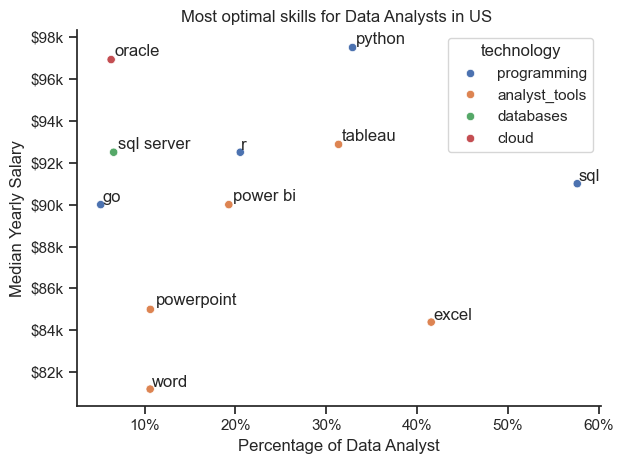

In [40]:
from adjustText import adjust_text

#df_da_skills_high_demand.plot(kind='scatter', x='skill_percentage', y='salary_median')

sns.scatterplot(data=df_plot, x='skill_percentage', y='salary_median',hue='technology')

sns.despine()
sns.set_theme(style='ticks')
# Prepare texts for adjustText

texts = []

for i, txt in enumerate (df_da_skills_high_demand.index):

    texts.append(plt.text(df_da_skills_high_demand['skill_percentage'].iloc[i], df_da_skills_high_demand['salary_median'].iloc[i], txt))

#Adjust text to avoid overlap

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

#Set axis labels, title, and legend

plt.xlabel('Percentage of Data Analyst')

plt.ylabel('Median Yearly Salary')

plt.title(f'Most optimal skills for Data Analysts in US ')

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#Adjust layout and display plot

plt.tight_layout()

plt.show()